# 1. 题目解读
你作为新兴数据的探索者和可视化设计者，被家乡一家小型游乐园管理员的要求回答几个关于其游乐园运营相关的问题。为了进行需求分析，他们向你提供了一个数据库，其中包含游乐园一天运营相关的信息其中数据，如下：
1. checkins 登记 :
- 描述：游乐园当天所有游客的登记数据。该数据包括两类登记数据: 推测登记数据和实际登
记数据。
- 字段：visitorID, timestamp, attraction, duration, type。

2. attractions 景点:
- 游乐园景点包括相应的景点编号、名称、区域、类别和类型。区域包括VAST 挑战地图，如过山
车场区 (Coaster Alley)、 冻原之地 (Tundra Land) 等等。类别包括惊险飞车 (Thrill Rides)、儿童碰碰车
(Kiddie Rides) 等。类型包括户外过山车 (Outdoor Coaster)、其他游乐项目 (Other Ride) 、旋转木马
(Carussel) 等等。
- 字段：attractionID, name, region, category, type

3. sequences 序列 :
- 游客登记序列。这些序列显示每五分钟进入游乐场的游客位置。如果游客尚未进入游乐场，则
该时间段内序列的值为 0 。如果游客在游乐场中，则序列显示游客时间上最近登记的景点，直到该遊
客登记其他景点，或离开游乐场。
- 字段：visitorID, sequence

管理员希望你创建四个图表：饼图、条形图、折线图和箱形图。所有这些图均可使用提供的数据创建。

图表 1：描绘游览惊险飞车（thrill ride）景点的饼图。

图表 2：描绘美食摊位（food stall）总访问量的柱状图。

图表 3：描绘一天之中参加最新游乐项目 Atmosfear 的折线图。

图表 4：描绘游乐场的儿童碰碰车（Kiddie Rides）总游览量的箱线图

In [87]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#正常显示中文
plt.rcParams["font.sans-serif"]=["SimHei"]

In [5]:
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

# 2. 检查各个表格
简单打印数据表中的内容，并通过pandas.DataFrame.describe()了解数据类型以及特点。

In [6]:
# 获取表名
c.execute("select name from sqlite_master where type='table'")
tab_name=c.fetchall()
tab_name=[line[0] for line in tab_name]
tab_name

['checkin', 'attraction', 'sequences']

In [10]:
#获取表的列名（字段名），保存在col_names列表,每个表的字段名集为一个列表
col_names=[]
for line in tab_name:
    c.execute('pragma table_info({})'.format(line))
    col_name=c.fetchall()
    col_name=[x[1] for x in col_name]
    col_names.append(col_name)
    col_name=tuple(col_name)
col_names

[['index', 'visitorID', 'timestamp', 'attraction', 'duration', 'type'],
 ['index', 'AttractionID', 'Name', 'Region', 'Category', 'type'],
 ['index', 'visitorID', 'sequence']]

In [11]:
# 检查表 checkin
sql = "SELECT visitorID, timestamp, attraction, duration, type FROM checkin"
df1 = pd.read_sql(sql, conn)
print(len(df1))
print(df1.describe())
print(df1.head())

506242
          visitorID     attraction
count  5.062420e+05  506242.000000
mean   1.052300e+06      32.212315
std    6.039318e+05      25.189779
min    4.360000e+02       1.000000
25%    5.375750e+05       8.000000
50%    1.051814e+06      30.000000
75%    1.574806e+06      48.000000
max    2.096715e+06      85.000000
   visitorID            timestamp  attraction duration      type
0        436  2014-06-08 09:48:51          83  0:00:59    actual
1        436  2014-06-08 09:56:46          42  0:08:03  inferred
2        436  2014-06-08 10:14:04           6  0:06:16    actual
3        436  2014-06-08 10:29:38           5  1:07:41    actual
4        436  2014-06-08 11:38:55          49  0:08:43  inferred


In [12]:
# 检查表 attraction
sql = "SELECT attractionId, name, region, category, type FROM attraction"
df2 = pd.read_sql(sql, conn)
print(len(df2))
print(df2.describe())
print(df2.head())

71
       AttractionID
count     71.000000
mean      36.774648
std       22.110888
min        1.000000
25%       18.500000
50%       36.000000
75%       53.500000
max       85.000000
   AttractionID                    Name         Region        Category  \
0             1  Wrightiraptor Mountain  Coaster Alley  Thrill Rides\r   
1             2      Galactosaurus Rage  Coaster Alley  Thrill Rides\r   
2             3      Auvilotops Express    Tundra Land  Thrill Rides\r   
3             4              TerrorSaur       Wet Land  Thrill Rides\r   
4             5       Wendisaurus Chase    Tundra Land  Thrill Rides\r   

              type  
0  Outdoor Coaster  
1  Outdoor Coaster  
2  Outdoor Coaster  
3       Other Ride  
4  Outdoor Coaster  


In [13]:
# 检查表 sequences
sql = "SELECT visitorID, sequence FROM sequences"
df3 = pd.read_sql(sql, conn)
print(len(df3))
print(df3.describe())
print(df3.head())

11374
          visitorID
count  1.137400e+04
mean   1.054370e+06
std    6.048169e+05
min    4.360000e+02
25%    5.355695e+05
50%    1.053090e+06
75%    1.580030e+06
max    2.096715e+06
   visitorID                                           sequence
0        436  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
1        878  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
2        941  0-0-0-0-0-0-0-0-0-0-84-0-1-1-24-24-24-8-1-0-3-...
3       1197  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
4       1217  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...


# 3. 描绘游览惊险飞车（thrill ride）景点的饼图
使用checkin表和attraction表。找到饼状图所需要的访问量：
1. 定位attraction中字段为category中thrill ride的景点名称和对应ID。
2. 在checking表中找到对应景点ID的出现次数。
3. 针对景点名称和访问次数，画图。

In [70]:
# 表拼接
tmp_q1_df = pd.merge(left=df1, right=df2, how='left', left_on='attraction', right_on='AttractionID')
# 确定category 为 thrill ride
tmp_q1_df = tmp_q1_df[tmp_q1_df['Category'] == 'Thrill Rides\r']
# count各个名称下的出现次数。
tmp_q1_result = tmp_q1_df.groupby('Name').count()['attraction'].reset_index()
tmp_q1_result

,Name,attraction
0,Atmosfear,27747
1,Auvilotops Express,18694
2,Firefall,16024
3,Flight of the Swingodon,16093
4,Galactosaurus Rage,18717
5,Keimosaurus Big Spin,18792
6,TerrorSaur,14415
7,Wendisaurus Chase,15577
8,Wrightiraptor Mountain,18700


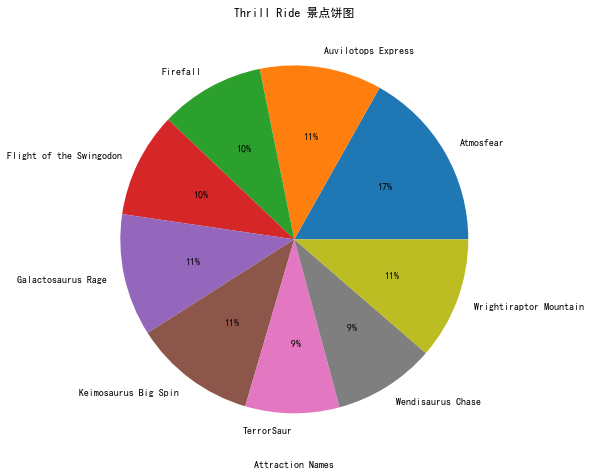

In [88]:
# 做出饼状图
plt.figure(figsize=(8, 8))
plt.pie(tmp_q1_result['attraction'], labels=tmp_q1_result['Name'], autopct='%2.0f%%')
plt.xlabel('Attraction Names')
plt.title('Thrill Ride 景点饼图')
plt.show()

# 4. 描绘美食摊位（food stall）总访问量的柱状图
使用checkin表和attraction表。找到柱状图所需要的访问量：
1. 定位attraction中字段为category中Food的景点名称和对应ID。
2. 在checking表中找到对应景点ID的出现次数。
3. 针对景点名称和访问次数，画图。

In [80]:
# 表拼接
tmp_q2_df = pd.merge(left=df1, right=df2, how='left', left_on='attraction', right_on='AttractionID')
# 确定category 为 Food
tmp_q2_df = tmp_q2_df[tmp_q2_df['Category'] == 'Food\r']
# count各个名称下的出现次数。
tmp_q2_result = tmp_q2_df.groupby('Name').count()['attraction'].sort_values(ascending=True).reset_index()
tmp_q2_result

,Name,attraction
0,Theresaur Food Stop,1116
1,Paleo Shreckwiches,1361
2,Shilobite o'Pizza,1393
3,Krystal Cook Cafe,1725
4,Granite Slab Pizza,2810
5,Plaisantly Popped Corn,2914
6,EberTrex Fries,3018
7,Permafrosties,3018
8,Smoky Wood BBQ,3037
9,Chensational Sweets,3049


Text(0.5, 1.0, '不同food stall的访问量')

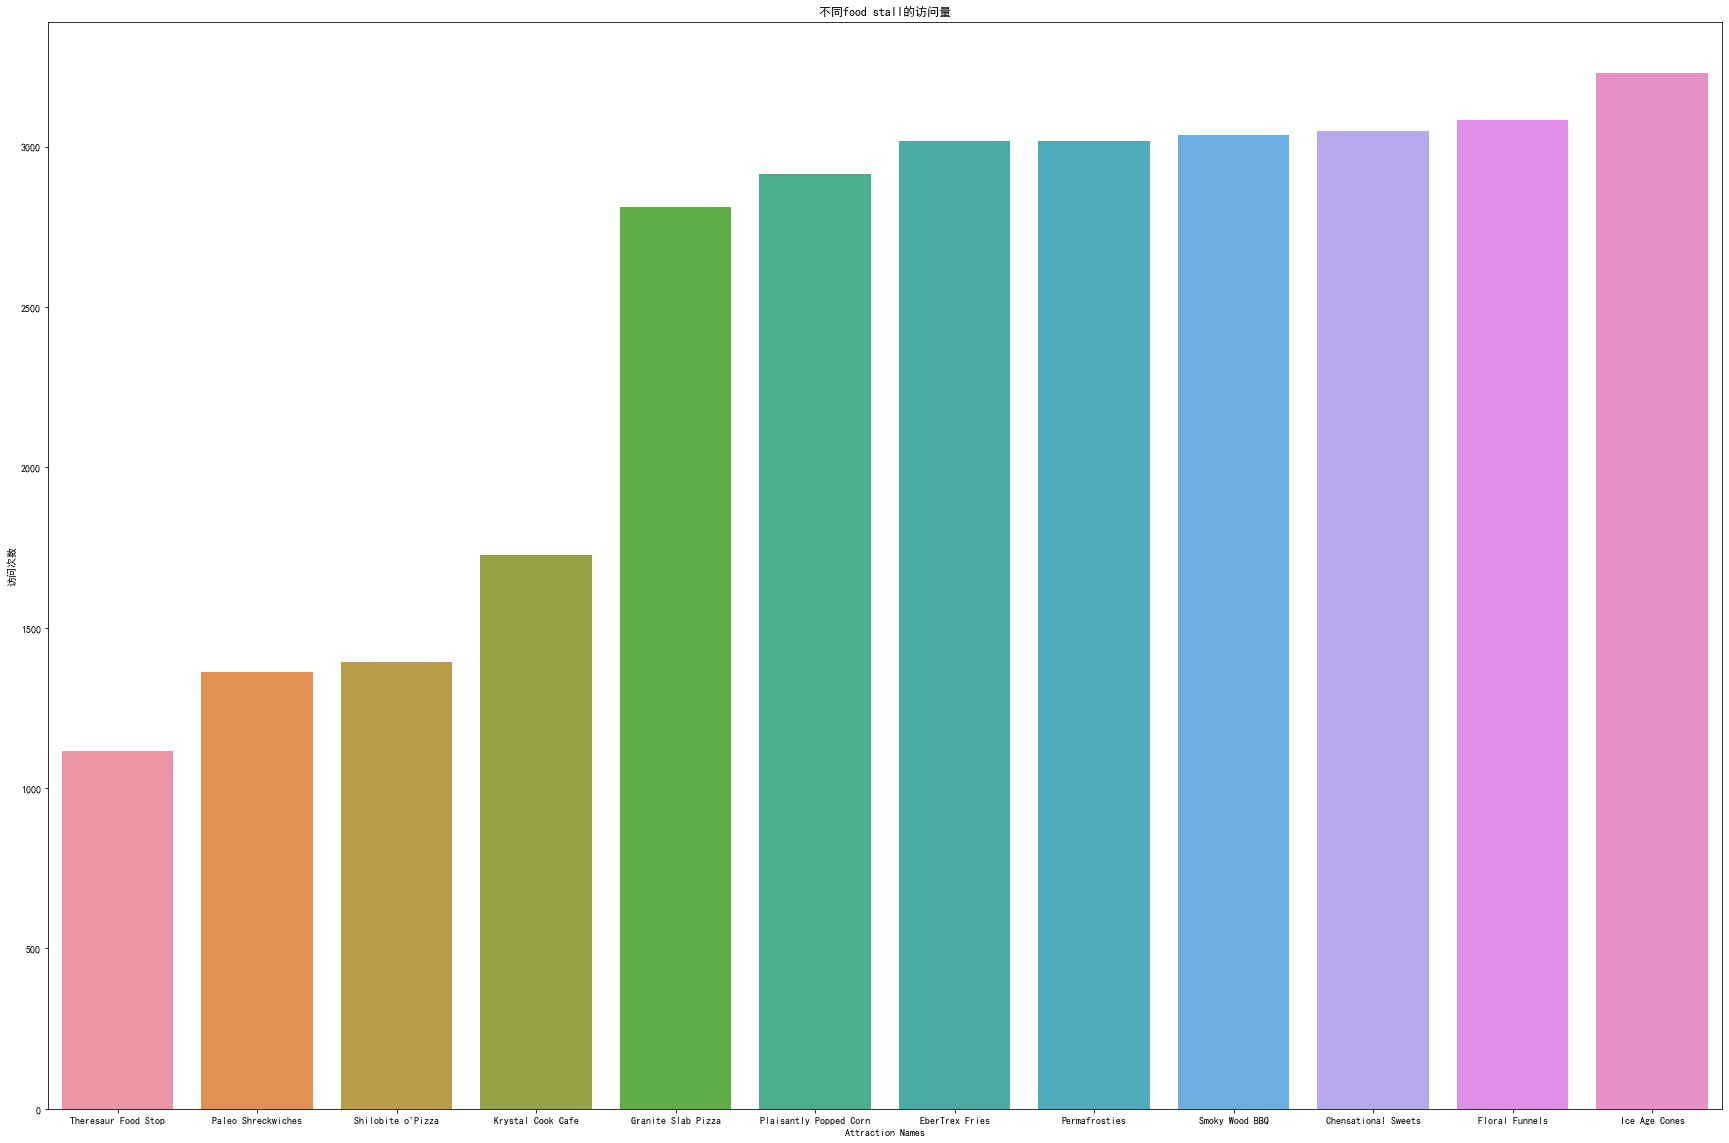

In [103]:
plt.figure(figsize=(30,20))
sns.barplot(x=tmp_q2_result['Name'], y=tmp_q2_result['attraction'], data=tmp_q2_result['attraction'])
plt.xlabel('Attraction Names')
plt.ylabel('访问次数')
plt.title('不同food stall的访问量')

# 5. 描绘一天之中参加最新游乐项目 Atmosfear 的折线图
使用checkin表和attraction表。找到折线图所需要的访问量：
1. 定位attraction中字段为Name中Atmosfear的景点名称和对应ID。
2. 在checking表中找到对应景点ID的一天内每6分钟统计一次出现次数。
3. 定位日内时间为x轴。
3. 针对时间作折线图。

In [131]:
# 转换duration时间为分钟
def transTimeToHour(a_duration):
    if a_duration is None:
        return None
    elif '@'in a_duration:
        return None
    sep_list = a_duration[:].split(':')  # 字符串切分
    hour = 0
    hour += int(sep_list[0])   # 小时
    hour += int(sep_list[1]) / 60  # 分钟转小时
    hour += int(sep_list[2]) / 60 / 60  # 秒转小时
    return round(hour, 1)  # 每0.1小时则为每6分钟

# 表拼接
tmp_q3_df = pd.merge(left=df1, right=df2, how='left', left_on='attraction', right_on='AttractionID')
# 确定Name 为 Atmosfear
tmp_q3_df = tmp_q3_df[tmp_q3_df['Name'] == 'Atmosfear']
# 重新处理时间
tmp_q3_df['new_time'] = tmp_q3_df['timestamp'].apply(lambda x: transTimeToHour(x[-8:]))
# 只看new_time并groupby
tmp_q3_result = tmp_q3_df.groupby('new_time').count()['attraction'].sort_values(ascending=True).reset_index()
tmp_q3_result

,new_time,attraction
0,22.8,3
1,22.7,3
2,23.0,4
3,23.1,5
4,8.1,7
...,...,...
145,11.4,318
146,12.5,330
147,13.8,345
148,16.1,355


Text(0.5, 1.0, '一天之中参加游乐项目Atmosfear的折线图')

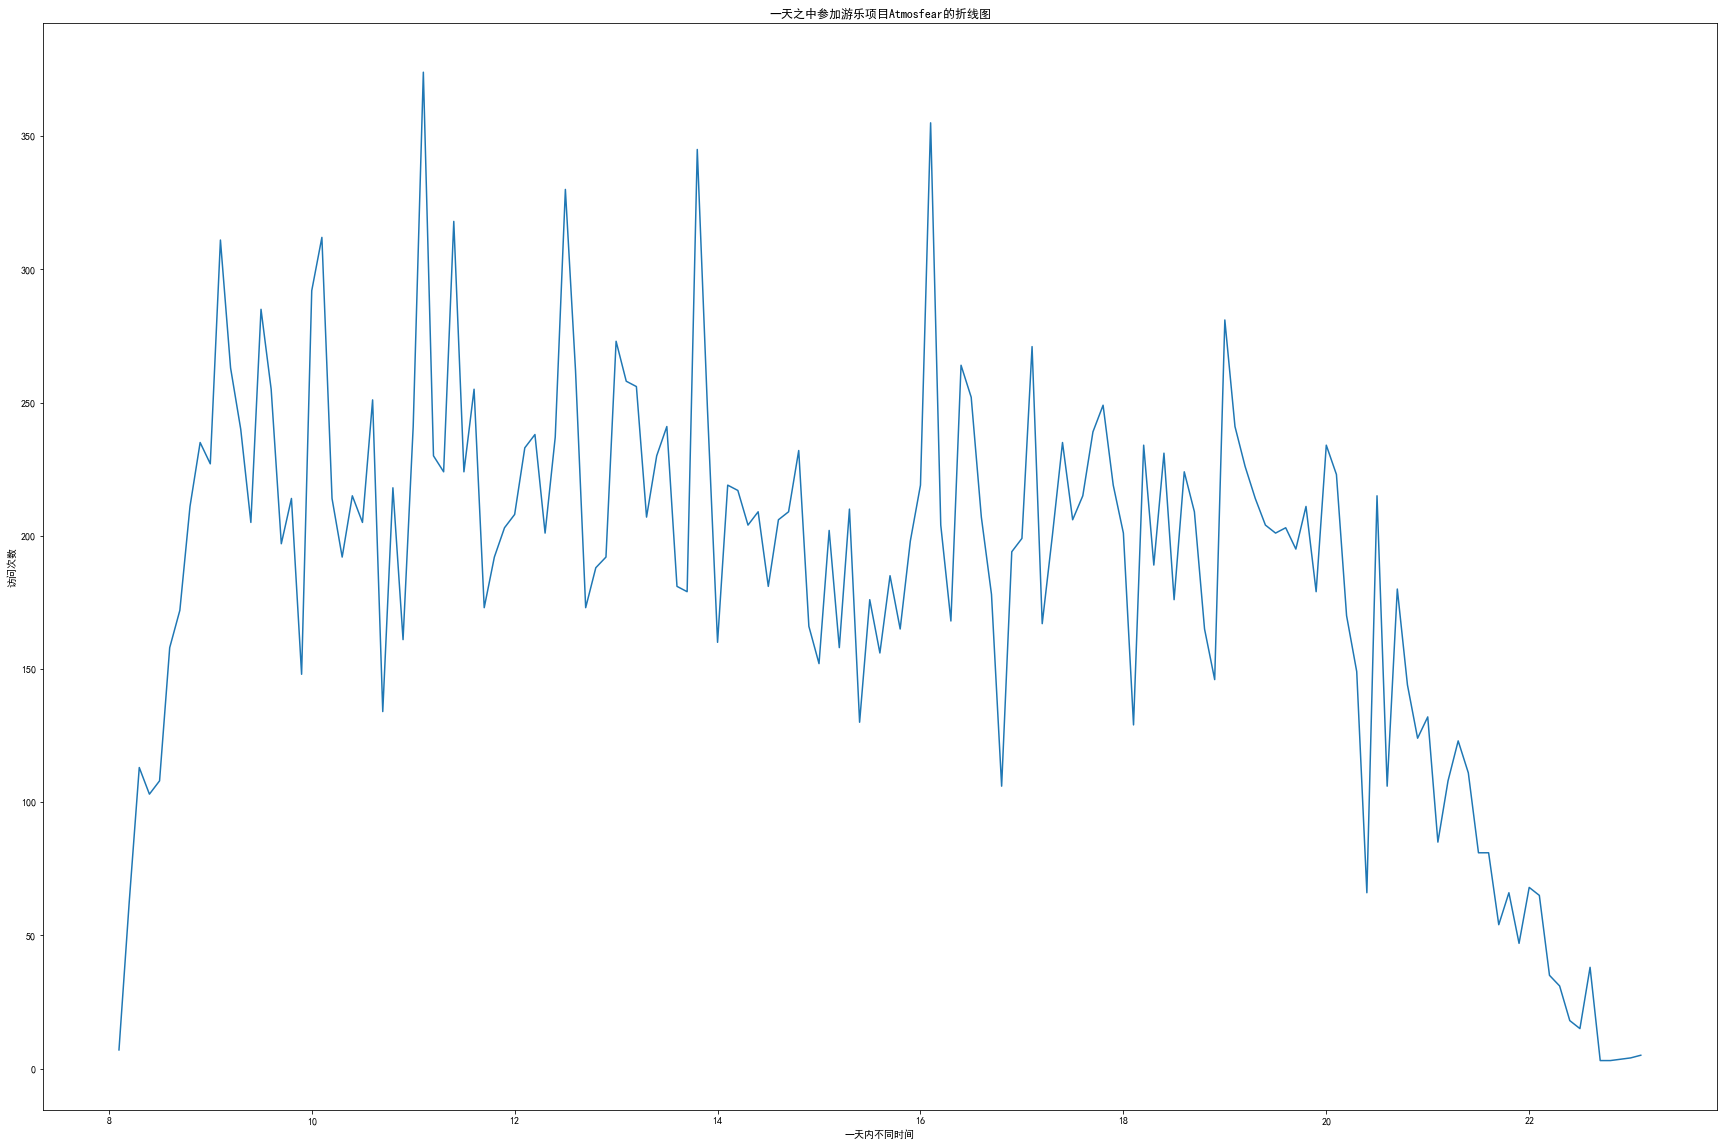

In [134]:
plt.figure(figsize=(30,20))
sns.lineplot(x="new_time", y="attraction", data=tmp_q3_result)
plt.xlabel('一天内不同时间')
plt.ylabel('访问次数')
plt.title('一天之中参加游乐项目Atmosfear的折线图')

# 6. 描绘游乐场的儿童碰碰车（Kiddie Rides）总游览量的箱线图。
使用checkin表和attraction表。找到箱线图所需要的访问量
1. 定位attraction中字段为category中Kiddie Rides的景点名称和对应ID。
2. 在checking表中找到对应景点ID的出现次数。
3. 针对景点名称和访问次数，画图。

In [137]:
# 表拼接
tmp_q4_df = pd.merge(left=df1, right=df2, how='left', left_on='attraction', right_on='AttractionID')
# 确定category 为 Kiddie Rides
tmp_q4_df = tmp_q4_df[tmp_q4_df['Category'] == 'Kiddie Rides\r']
# count各个名称下的出现次数。
tmp_q4_result = tmp_q4_df.groupby('Name').count()['attraction'].sort_values(ascending=True).reset_index()
tmp_q4_result

,Name,attraction
0,North Line,3597
1,Flying TyrAndrienkos,3640
2,Cyndisaurus Asteroid,3747
3,Enchanted Toadstools,3747
4,Jeredactyl Jump,3759
5,Stone Cups,3877
6,Blue Iguanodon,3922
7,Stegocycles,3925
8,Beelzebufo,3963
9,Wild Jungle Cruise,4022


Text(0.5, 1.0, 'Kiddie Rides总游览量的箱线图')

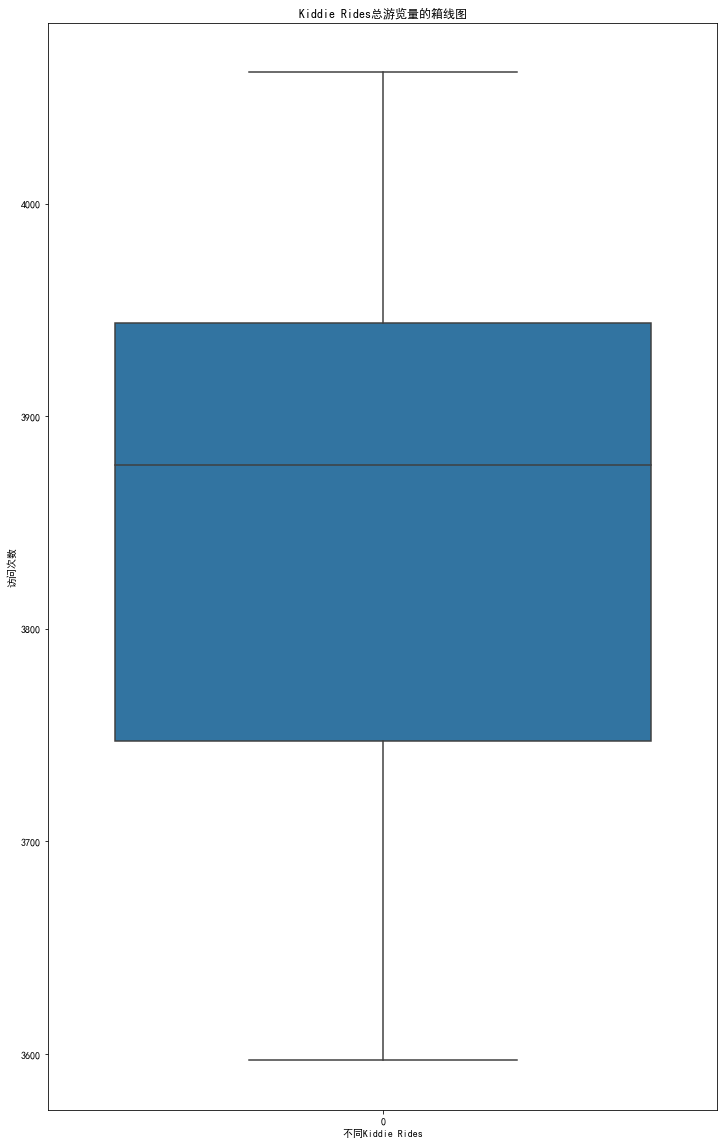

In [144]:
plt.figure(figsize=(12,20))
sns.boxplot(data=tmp_q4_result['attraction'])
plt.xlabel('不同Kiddie Rides')
plt.ylabel('访问次数')
plt.title('Kiddie Rides总游览量的箱线图')